In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
evaluation_frame = pd.read_csv("../assembly_evaluation_data/MMETSP_plotting_data.csv",index_col="SampleName")

In [3]:
reads_frame2 = evaluation_frame[['Phylum','Input.Reads','Unique_kmers_assembly','mean_orf_percent.x','score.x','Complete_eukaryotic_BUSCO_perc']].dropna()

KeyboardInterrupt: 

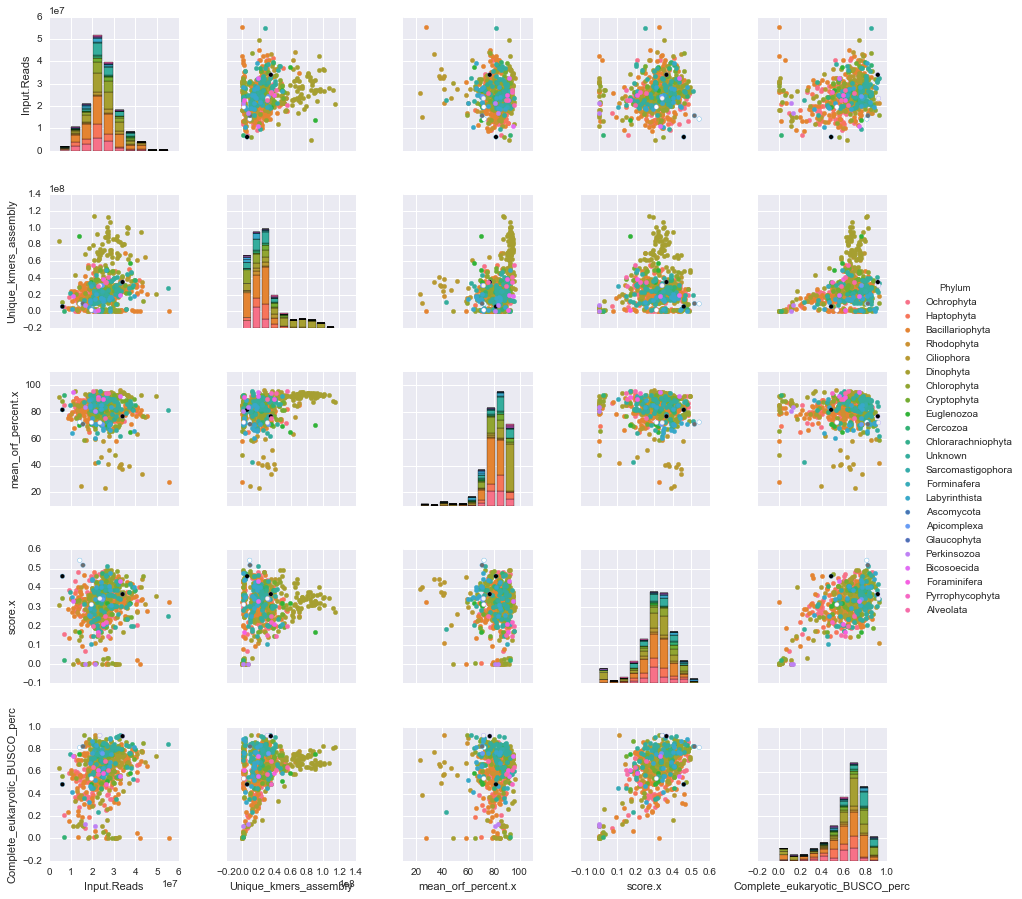

In [4]:
g = sns.PairGrid(reads_frame2, hue="Phylum", dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
g.savefig("busco_orf_scatter.pdf")

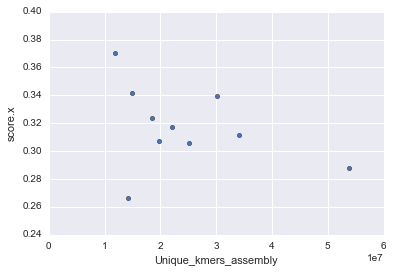

In [27]:
groups_of_interest=reads_frame2.groupby('Phylum').count().sort_values(by='Input.Reads', ascending=False).iloc[0:10].index

AttributeError: 'AxesSubplot' object has no attribute 'add_legend'

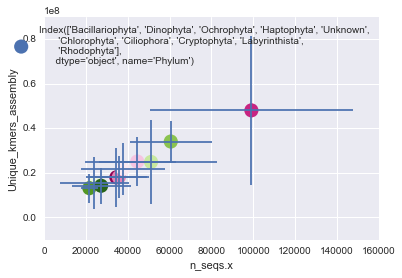

In [83]:
import palettable as pal
reads_mean=evaluation_frame.groupby('Phylum').mean().loc[groups_of_interest]
reads_std=evaluation_frame.groupby('Phylum').std().loc[groups_of_interest]

X='n_seqs.x'
Y='Unique_kmers_assembly'

t=range(len(reads_mean.index))
fig,ax=plt.subplots(1)
cmap=pal.colorbrewer.qualitative.Accent_8.hex_colors
# for n,i in enumerate(groups_of_interest):
#     reads_mean.loc[i].plot(kind='scatter', x=X, y=Y, 
#                 yerr=reads_std.loc[i], xerr=reads_std.loc[i], 
#                 color=cmap[n])
reads_mean.plot(kind='scatter', x=X, y=Y, 
            yerr=reads_std, xerr=reads_std, 
            c=t, lw=0, s=200, 
                cmap=pal.colorbrewer.diverging.PiYG_11.get_mpl_colormap(), ax=ax, 
                colorbar=False, label=reads_mean.index)

ax.legend()x

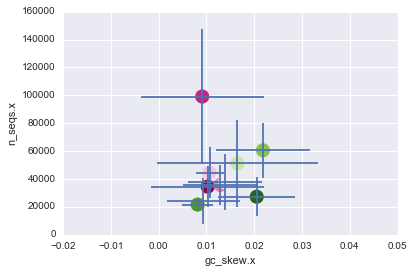

In [77]:
import palettable as pal
reads_mean=evaluation_frame.groupby('Phylum').mean().loc[groups_of_interest]
reads_std=evaluation_frame.groupby('Phylum').std().loc[groups_of_interest]

X='gc_skew.x'
Y='n_seqs.x'

t=range(len(reads_mean.index))
fig,ax=plt.subplots(1)
cmap=pal.colorbrewer.qualitative.Accent_8.hex_colors
# for n,i in enumerate(groups_of_interest):
#     reads_mean.loc[i].plot(kind='scatter', x=X, y=Y, 
#                 yerr=reads_std.loc[i], xerr=reads_std.loc[i], 
#                 color=cmap[n])
reads_mean.plot(kind='scatter', x=X, y=Y, 
            yerr=reads_std, xerr=reads_std, 
            c=t, lw=0, s=200, 
                cmap=pal.colorbrewer.diverging.PiYG_11.get_mpl_colormap(), ax=ax, colorbar=False)

In [59]:

reads_mean.loc[i]

Unnamed: 0                        3.502021e+02
Input.Reads                       2.258623e+07
Surviving.Reads                   2.246428e+07
Percent.Surviving                 9.943119e+01
n_seqs.x                          3.457691e+04
smallest.x                        2.011329e+02
largest.x                         1.118350e+04
n_bases.x                         2.891809e+07
mean_len.x                        8.368984e+02
n_under_200.x                     0.000000e+00
n_over_1k.x                       9.661896e+03
n_over_10k.x                      3.658960e+00
n_with_orf.x                      1.632231e+04
mean_orf_percent.x                7.949901e+01
n90.x                             3.655549e+02
n70.x                             7.947110e+02
n50.x                             1.244387e+03
n30.x                             1.821919e+03
n10.x                             3.016936e+03
gc.x                              4.647076e-01
gc_skew.x                         1.026012e-02
at_skew.x    

Figure 3. Pairwise correlation trends of evaluation metrics categorized by Phylum with univariate distribution each metric on the diagonal. There appears to be a positive relationship between transrate score and BUSCO score. Samples from the Dinophyta phylum tend to have a higher number of unique k-mers, higher BUSCO and transrate scores. Assemblies with a high open reading frame (orf) content tend to have variable transrate and BUSCO scores, while low number of unique k-mers tend to have variable BUSCO scores.

In [13]:
reads_frame1 = evaluation_frame[['Phylum','Input.Reads','Unique_kmers_assembly','num_kmers_reads_diginorm','proportion_kept_diginorm']].dropna()

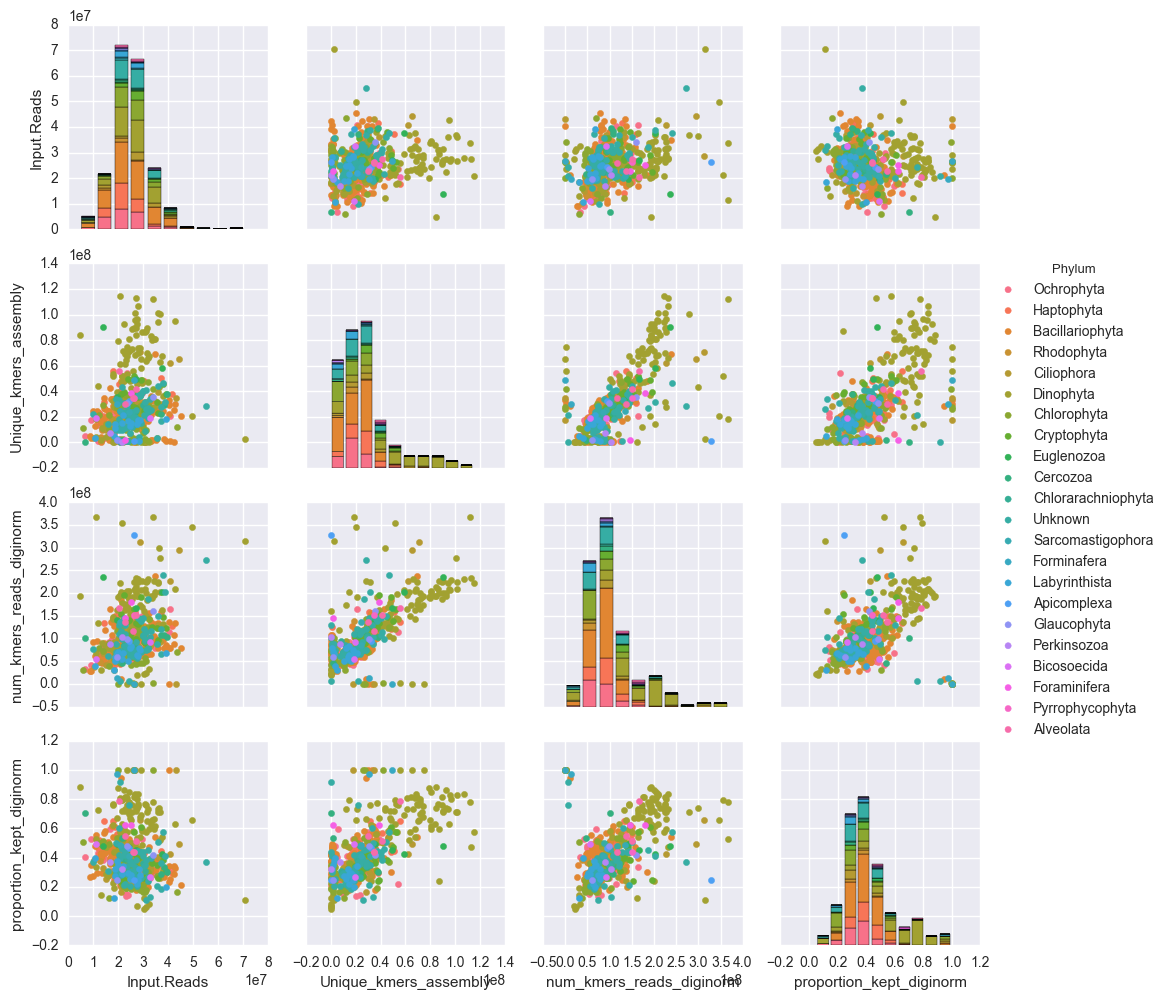

In [6]:
g = sns.PairGrid(reads_frame1, hue="Phylum", dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
g.savefig("kmer_scatter.pdf")

Supplemental Figure. There does not appear to be a relationship between the number of input reads and unique k-mers in assemblies. The unique number of k-mers in reads is postively correlated with the number of reads kept after digital normalization.

In [22]:
reads_frame3 = evaluation_frame[['Phylum','n_seqs.x','p_refs_with_CRBB','largest.x','n50.x']].dropna()

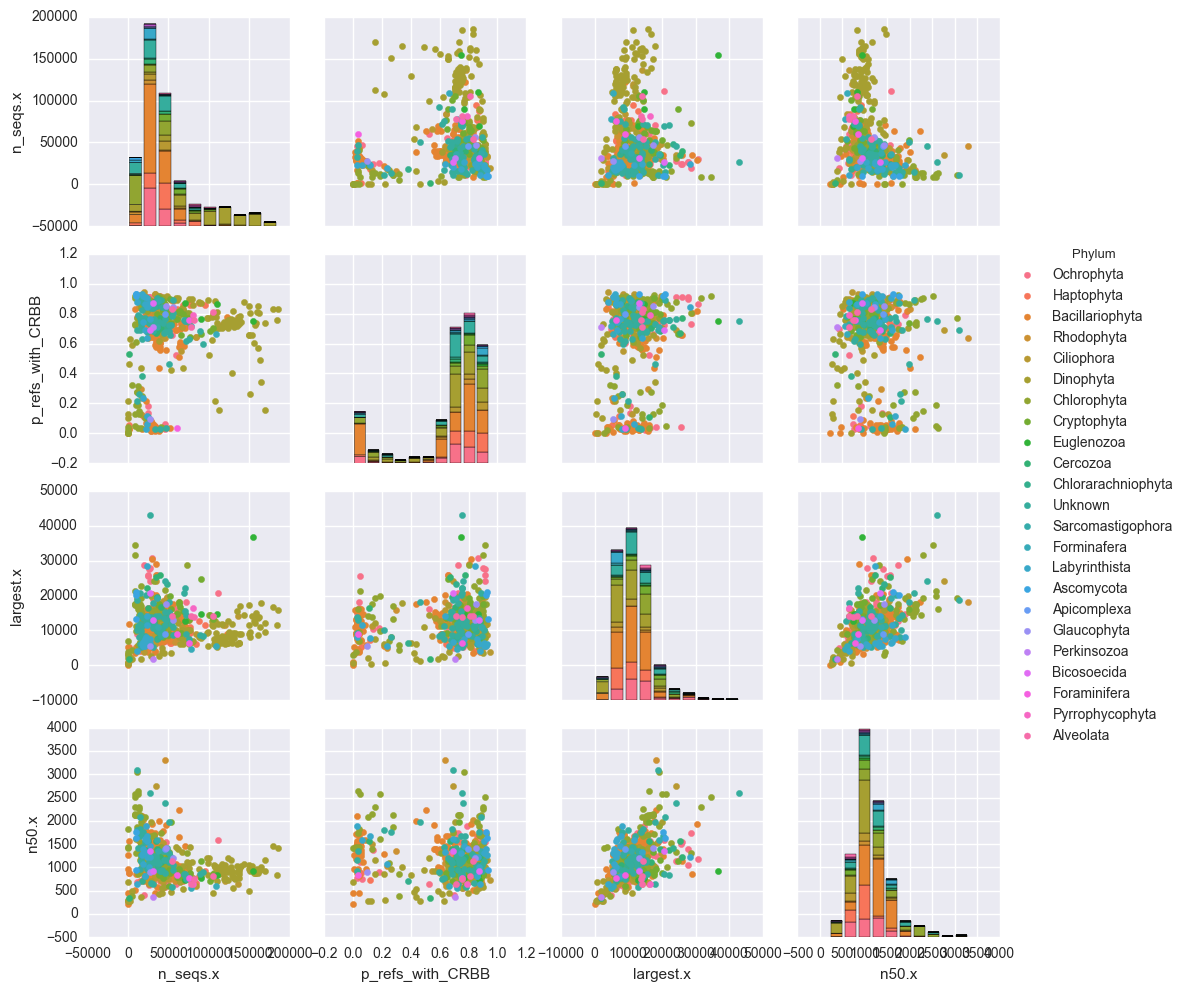

In [23]:
g = sns.PairGrid(reads_frame3, hue="Phylum", dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
g.savefig("n_seqs_scatter.pdf")

In [20]:
evaluation_frame.columns

Index(['Unnamed: 0', 'Run.x', 'Phylum', 'Input.Reads', 'Surviving.Reads',
       'Percent.Surviving', 'n_seqs.x', 'smallest.x', 'largest.x', 'n_bases.x',
       'mean_len.x', 'n_under_200.x', 'n_over_1k.x', 'n_over_10k.x',
       'n_with_orf.x', 'mean_orf_percent.x', 'n90.x', 'n70.x', 'n50.x',
       'n30.x', 'n10.x', 'gc.x', 'gc_skew.x', 'at_skew.x', 'cpg_ratio.x',
       'linguistic_complexity.x', 'fragments', 'fragments_mapped',
       'p_fragments_mapped', 'good_mappings', 'p_good_mapping', 'bad_mappings',
       'potential_bridges', 'bases_uncovered', 'p_bases_uncovered',
       'contigs_uncovbase', 'p_contigs_uncovbase', 'contigs_uncovered',
       'p_contigs_uncovered', 'contigs_lowcovered', 'p_contigs_lowcovered',
       'contigs_segmented', 'p_contigs_segmented', 'score.x',
       'optimal_score.x', 'cutoff.x', 'CRBB_hits', 'n_contigs_with_CRBB',
       'p_contigs_with_CRBB', 'rbh_per_reference', 'n_refs_with_CRBB',
       'p_refs_with_CRBB', 'cov25', 'p_cov25', 'cov50', 'p_co